# Assignment 3: PCA And t-SNE

# Import Libraries

In [38]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

# initializing the pca
from sklearn.decomposition import PCA


# Load the MINST data

MINST data is one of the famous publicly available datasets used for machine learning projects and tasks. It is a data set of handwritten numbers. Another public dataset you have explored is the Iris dataset which you have explored in the lab. More information about the MINST data.
 
More information about the MINST dataset is found in several online resoruces, for example:
http://yann.lecun.com/exdb/mnist/

In [39]:
(x_train, y_train), (_ , _) = mnist.load_data()
X = x_train[:3000]
y = y_train[:3000]
print(X.shape)
print(y.shape)

x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)

(3000, 28, 28)
(3000,)
(60000, 784)


# Run t-SNE on the loaded MINST data and display the results

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.052s...
[t-SNE] Computed neighbors for 60000 samples in 259.877s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

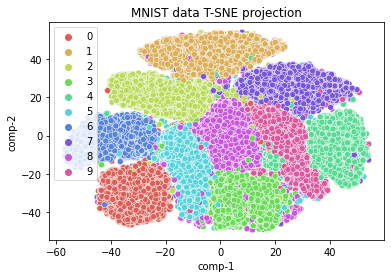

In [40]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

# Apply PCA

train_img shape : (60000, 2)
Total number of components used after PCA : 2


[Text(0.5, 1.0, 'MNIST data PCA projection')]

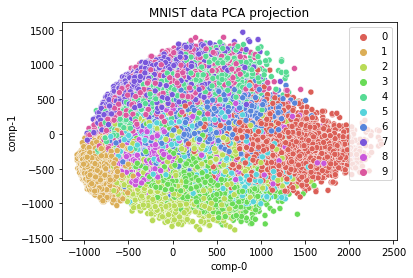

In [41]:
### To Do ###
# Apply PCA on the original data. Try different types of components and plot the results
############
pca = PCA(n_components=2,random_state=123)
train_img = pca.fit_transform(x_mnist)
print(f'train_img shape : {train_img.shape}')
print(f'Total number of components used after PCA : {pca.n_components_}')


pcadf = pd.DataFrame()
pcadf["y"] = y_train
for i in range(pca.n_components_):
  pcadf[f"comp-{i}"] = train_img[:,i]

pcadf.head()

sns.scatterplot(x=("comp-0"), y=("comp-1"), hue=pcadf.y.tolist(),
                  palette=sns.color_palette("hls", 10),data=pcadf).set(title="MNIST data PCA projection")

# Question: what are the different components you generated from PCA? Comment on the results.

In [42]:
pcadf.head()

,y,comp-0,comp-1
0,5,123.932985,-312.705256
1,0,1011.719208,-294.859228
2,4,-51.849184,392.148835
3,1,-799.126526,-607.236239
4,9,-382.755410,730.607463


In [43]:
df.head()

,y,comp-1,comp-2
0,5,-12.892805,-17.610130
1,0,-31.341562,-26.089783
2,4,50.070114,-12.242747
3,1,14.429595,40.818222
4,9,24.212259,0.404923


The components genrated from PCA have higher range than those generated by t-SNE, since they are direct projection of the data, the thing that might have caused such a thing is the standarization of the data. The data might have need more standarization before perfoming the pca and t-SNE on it, which result in extremely different ouputs.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.040s...
[t-SNE] Computed neighbors for 60000 samples in 1.306s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sam

[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

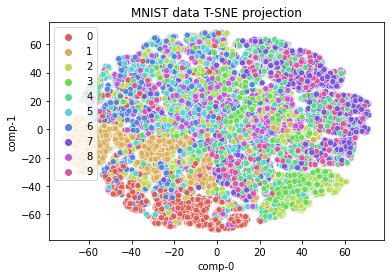

In [45]:
### To Do ###
# Apply t-SNE on the PCA components
############
zx = tsne.fit_transform(pcadf)
t_sne_df = pd.DataFrame()
t_sne_df["y"] = y_train

for i in range(tsne.n_components):
  t_sne_df[f"comp-{i}"] = zx[:,i]

sns.scatterplot(x="comp-0", y="comp-1", hue=t_sne_df.y.tolist(),
                palette=sns.color_palette("hls", 10),data=t_sne_df).set(title="MNIST data T-SNE projection")

# Question: What did you notice from the different figures you generated? 
You can check this link for more insight (until section 4)
https://distill.pub/2016/misread-tsne/

Looking at both the result of t-SNE and PCA there is great difference between their results. The results are t-SNE are more culsterd togeather which gives a better representation of the data, While the opposite can be said about PCA in this instance, where the visualization is not extremely, but that might have to do with normalization more than anything else. Eeven though the culster sizes and distance might mean nothing in t-SNE, t-SNE gives a better a idea of the data, the only issue is that the hyper-parameter extremely matter in t-SNE where tuning the hyper-parameters might change the results wildly and look extremely different from each other.